In [1]:
from linescanning import utils, plotting,prf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import numpy as np
opj = os.path.join


In [3]:
subject = "999"
ses = 0
run = "demo"
task = "SR"

log_dir = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs"
scr_path = opj(log_dir, f"sub-{subject}_ses-{session}_task-{task}_run-{run}", f"sub-{subject}_ses-{ses}_task-{task}_run-{run}_Screenshots")
ff = utils.FindFiles(scr_path, extension="png").files

print(ff)

if len(ff)>0:
    imgs = []
    for file in ff:
        img = (255*mpimg.imread(file)).astype('int')
        img_bin = np.zeros_like(img[...,0])
        img_bin[np.where(((img[..., 0] < 40) & (img[..., 1] < 40)) | ((img[..., 0] > 200) & (img[..., 1] > 200)))] = 1
        imgs.append(img)

    fig,axs = plt.subplots(ncols=4,figsize=(20,5))
    cols = ["r","g","b"]
    for ix,img in enumerate(imgs):
        cm = utils.make_binary_cm(cols[ix])
        axs.imshow(img, cmap=cm)
        plotting.conform_ax_to_obj(ax=axs[0], title="overlap")

    for ix,img in enumerate(imgs):
        axs[ix].imshow(img)
        plotting.conform_ax_to_obj(ax=axs[1+ix], title=f"ev-{ix+1}")

    fname = opj(os.path.dirname(scr_path), f"sub-{subject}_ses-{session}_task-SR_run-{run}_desc-stimuli")
    print(f"Writing '{fname}'")
    for ext in ["svg","png"]:
        fig.savefig(
            f"{fname}.{ext}",
            bbox_inches="tight",
            facecolor="white",
            dpi=300
        )




[]


In [38]:
imgs = []
for file in ff:
    img = (255*mpimg.imread(file)).astype('int')
    img_bin = np.zeros_like(img[...,0])
    img_bin[np.where(((img[..., 0] < 40) & (img[..., 1] < 40)) | ((img[..., 0] > 200) & (img[..., 1] > 200)))] = 1
    imgs.append(img)


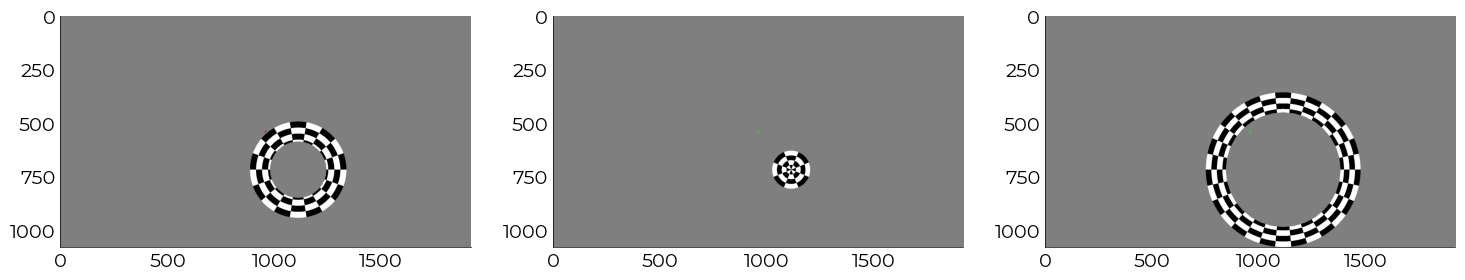

In [39]:
fig,axs = plt.subplots(ncols=len(imgs),figsize=(len(imgs)*6,5))
for ix,img in enumerate(imgs):
    axs[ix].imshow(img)
    plotting.conform_ax_to_obj(ax=axs[ix])


(<Axes: >, <linescanning.plotting.Defaults at 0x7f6a779184f0>)

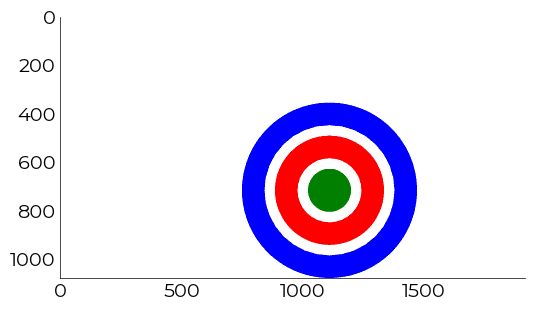

In [36]:
fig,axs = plt.subplots(figsize=(6,5))
cols = ["r","g","b"]
for ix,img in enumerate(imgs):
    cm = utils.make_binary_cm(cols[ix])
    axs.imshow(img, cmap=cm)

plotting.conform_ax_to_obj(ax=axs)
